In [16]:
#Authors: Adam Lewandowski, Ivan Sladkov, Patrick English
import numpy as np
import pandas as pd
import time
from sklearn import svm
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

#Import Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [40]:
#Import vectorised tweets
vec_tweets = pd.read_csv("vec.csv")

In [41]:
#Take target data from raw 
raw_tweets_df = pd.read_csv("data/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", header=None)
raw_tweets_df.columns = ['target', 'id','date','flag','user','text']
target_data = pd.DataFrame(raw_tweets_df["target"])

In [42]:
# Data join + train/test

combined_data = vec_tweets.join(target_data)


#train/test create
msk = np.random.rand(len(combined_data)) < 0.8
train = combined_data[msk]
test = combined_data[~msk]


In [43]:
#Sample dataframe for multiple model testing

sampled_df = combined_data.sample(frac=0.00625)

In [44]:
sampled_df.target.value_counts() # Visual check to ensure balance

0    5044
4    4956
Name: target, dtype: int64

In [45]:
#Data division

#Map pos/neg to 0/1
sampled_df["target"].replace(4, 1, inplace=True)

msk = np.random.rand(len(sampled_df)) < 0.8
train = sampled_df[msk]
test = sampled_df[~msk]



# Create X and Y for training

y_train = train.pop("target")
X_train = train

# Create X and Y for testing
y_test = test.pop("target")
X_test = test

In [46]:
#Model set-up
#Linear Regression
log_reg = LogisticRegression(solver="lbfgs",max_iter =10000)
log_reg.fit(X_train, y_train)

#kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Random Forest
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_train, y_train)

#SVM
lin_svm = svm.SVC(kernel="rbf",probability=True)
lin_svm.fit(X_train,y_train)


E:\Anaconda\envs\dl\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\envs\dl\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

,LogisticRegression,KNeighborsClassifier,RandomForestClassifier,SVC
Accuracy,0.686794,0.601375,0.582720,0.519882
F1,0.689990,0.613333,0.648760,0.039293
Precision,0.667921,0.582805,0.550877,0.869565
Recall,0.713568,0.647236,0.788945,0.020101
Roc_auc,0.687398,0.602409,0.587371,0.508611


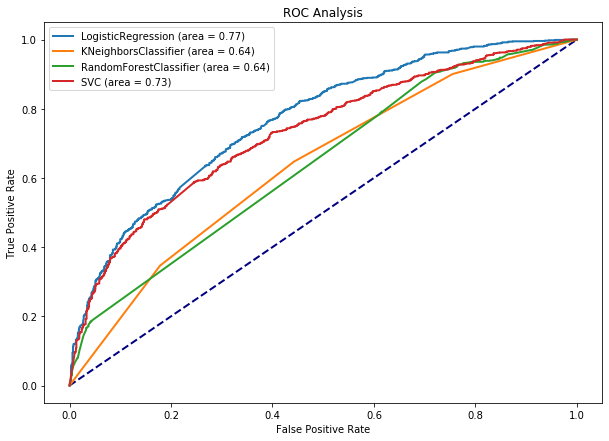

In [47]:
models = [log_reg,knn,rf,lin_svm ]


# ROC Curves Figure
orig_fig = plt.figure(figsize=(10,7))
plt.title('ROC Analysis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
lw = 2



plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#Create empty frame for reports
report_frame = {}

#Run models in loop
for model in models:
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)
    model_name = str(model.__class__).split('.')[-1].split('\'')[0]
    
    model_scores ={}
    model_scores['Accuracy'] = accuracy_score(y_test,y_pred)
    model_scores['F1'] = f1_score(y_test,y_pred)
    model_scores['Precision'] = precision_score(y_test,y_pred)
    model_scores["Recall"] = recall_score(y_test,y_pred)
    model_scores["Roc_auc"] = roc_auc_score(y_test,y_pred)
    report_frame[model_name] = model_scores
    #ROC
    fpr, tpr, t = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    #plot roc
    plt.plot(fpr, tpr,
             lw=lw, label=str(model_name)+' (area = %0.2f)' % roc_auc)

        
plt.legend()
orig_frame = pd.DataFrame.from_dict(report_frame)
orig_frame

# PCA 

In [48]:
pca = PCA(n_components=100)


In [49]:
#Apply PCA to train/test data
ptrain = pd.DataFrame(data = pca.fit_transform(X_train))
ptest = pd.DataFrame(data = pca.fit_transform(X_test))

In [50]:
#Model set-up
#Linear Regression
log_reg = LogisticRegression(solver="lbfgs",max_iter =10000)
log_reg.fit(ptrain, y_train)

#kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(ptrain, y_train)

#Random Forest
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(ptrain, y_train)

#SVM
lin_svm = svm.SVC(kernel="rbf",probability=True)
lin_svm.fit(ptrain,y_train)

E:\Anaconda\envs\dl\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\envs\dl\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

,LogisticRegression,KNeighborsClassifier,RandomForestClassifier,SVC
Accuracy,0.504664,0.503682,0.504664,0.509082
F1,0.511853,0.505623,0.391802,0.526963
Precision,0.493470,0.492381,0.489458,0.497766
Recall,0.531658,0.519598,0.326633,0.559799
Roc_auc,0.505273,0.504041,0.500649,0.510226


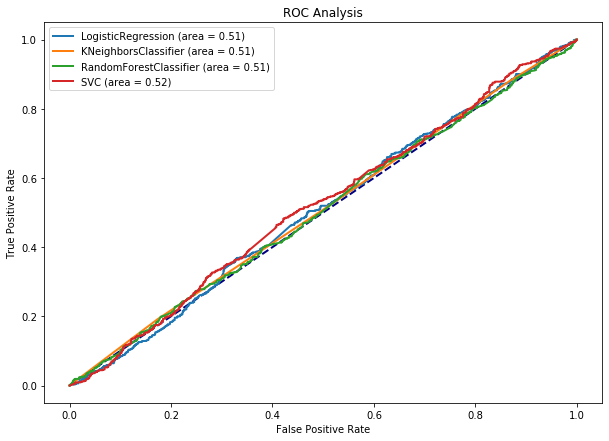

In [51]:
models = [log_reg,knn,rf,lin_svm ]


# ROC Curves Figure
orig_fig = plt.figure(figsize=(10,7))
plt.title('ROC Analysis')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
lw = 2



plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#Create empty frame for reports
report_frame = {}

#Run models in loop
for model in models:
    y_pred = model.predict(ptest)
    y_score = model.predict_proba(ptest)
    model_name = str(model.__class__).split('.')[-1].split('\'')[0]
    
    model_scores ={}
    model_scores['Accuracy'] = accuracy_score(y_test,y_pred)
    model_scores['F1'] = f1_score(y_test,y_pred)
    model_scores['Precision'] = precision_score(y_test,y_pred)
    model_scores["Recall"] = recall_score(y_test,y_pred)
    model_scores["Roc_auc"] = roc_auc_score(y_test,y_pred)
    report_frame[model_name] = model_scores
    #ROC
    fpr, tpr, t = roc_curve(y_test, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    #plot roc
    plt.plot(fpr, tpr,
             lw=lw, label=str(model_name)+' (area = %0.2f)' % roc_auc)

        
plt.legend()
orig_frame = pd.DataFrame.from_dict(report_frame)
orig_frame

# Word2Vec
